In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix, classification_report

# 1. Загрузка данных
df = pd.read_csv('S05-hw-dataset.csv')

# 2. Первичный анализ
print("Первые 5 строк:")
display(df.head())

print("\nИнформация о типах данных:")
df.info()

print("\nОписательные статистики:")
display(df.describe())

# 3. Распределение таргета
target_dist = df['default'].value_counts(normalize=True)
print(f"\nРаспределение таргета (default):\n{target_dist}")

# Краткий вывод для отчета:
# В датасете 3000 объектов и 17 признаков. Пропусков нет.
# Таргет распределен: ~60% (0) и ~40% (1), что подтверждает умеренный дисбаланс.

Первые 5 строк:


,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
0,1,25,94074,22,839,0.547339,1,7,0,0,26057,5229,0.080052,19,1,8,0
1,2,58,51884,26,565,0.290882,1,1,0,1,16221,11595,0.428311,15,0,7,0
2,3,53,48656,39,561,0.522340,1,13,0,0,55448,-2947,0.770883,15,4,5,0
3,4,42,81492,30,582,0.709123,2,10,1,1,35188,17727,0.357619,0,2,7,1
4,5,42,94713,8,642,0.793392,3,3,0,0,0,-404,0.414260,17,1,10,1



Информация о типах данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   client_id                       3000 non-null   int64  
 1   age                             3000 non-null   int64  
 2   income                          3000 non-null   int64  
 3   years_employed                  3000 non-null   int64  
 4   credit_score                    3000 non-null   int64  
 5   debt_to_income                  3000 non-null   float64
 6   num_credit_cards                3000 non-null   int64  
 7   num_late_payments               3000 non-null   int64  
 8   has_mortgage                    3000 non-null   int64  
 9   has_car_loan                    3000 non-null   int64  
 10  savings_balance                 3000 non-null   int64  
 11  checking_balance                3000 non-null   int64  
 12  region

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,45.059667,69658.992000,19.577667,649.285333,0.284065,3.494667,6.869333,0.495000,0.501333,20607.256667,5559.684333,0.400175,9.524667,1.976333,6.968667,0.410333
std,866.169729,14.192883,24742.235182,11.381497,69.955852,0.161112,2.289917,4.291278,0.500058,0.500082,14035.209739,6306.032612,0.204529,5.779030,1.408700,4.349942,0.491976
min,1.000000,21.000000,15000.000000,0.000000,402.000000,0.006147,0.000000,0.000000,0.000000,0.000000,0.000000,-3000.000000,0.001148,0.000000,0.000000,0.000000,0.000000
25%,750.750000,33.000000,52641.750000,10.000000,604.000000,0.157796,1.000000,3.000000,0.000000,0.000000,9612.250000,341.500000,0.239208,5.000000,1.000000,3.000000,0.000000
50%,1500.500000,45.000000,69784.500000,20.000000,647.000000,0.261726,3.000000,7.000000,0.000000,1.000000,20021.000000,5114.500000,0.381992,10.000000,2.000000,7.000000,0.000000
75%,2250.250000,57.000000,85874.250000,29.000000,697.000000,0.388886,6.000000,10.000000,1.000000,1.000000,30101.250000,9906.250000,0.549213,15.000000,3.000000,11.000000,1.000000
max,3000.000000,69.000000,156351.000000,39.000000,850.000000,0.878343,7.000000,14.000000,1.000000,1.000000,75237.000000,29335.000000,0.961733,19.000000,4.000000,14.000000,1.000000



Распределение таргета (default):
default
0    0.589667
1    0.410333
Name: proportion, dtype: float64


In [9]:
# Разделение признаков
X = df.drop(columns=['client_id', 'default'])
y = df['default']

# Разбиение на train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Бейзлайн: Dummy модель (самый частый класс)
dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(X_train, y_train)

dummy_preds = dummy.predict(X_test)
dummy_probs = dummy.predict_proba(X_test)[:, 1]

print(f"Бейзлайн Accuracy: {accuracy_score(y_test, dummy_preds):.3f}")
print(f"Бейзлайн ROC-AUC: {roc_auc_score(y_test, dummy_probs):.3f}")

Бейзлайн Accuracy: 0.590
Бейзлайн ROC-AUC: 0.500


In [10]:
# Создаем Pipeline
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(max_iter=1000, random_state=42))
])

# Простой перебор параметра C
best_score = 0
best_c = 1.0
results = []

for c in [0.01, 0.1, 1.0, 10.0]:
    pipe.set_params(logreg__C=c)
    pipe.fit(X_train, y_train)
    y_proba = pipe.predict_proba(X_test)[:, 1]
    score = roc_auc_score(y_test, y_proba)
    results.append({'C': c, 'ROC-AUC': score})
    
    if score > best_score:
        best_score = score
        best_c = c

print(f"Лучший параметр C: {best_c} с ROC-AUC: {best_score:.4f}")

Лучший параметр C: 10.0 с ROC-AUC: 0.8756


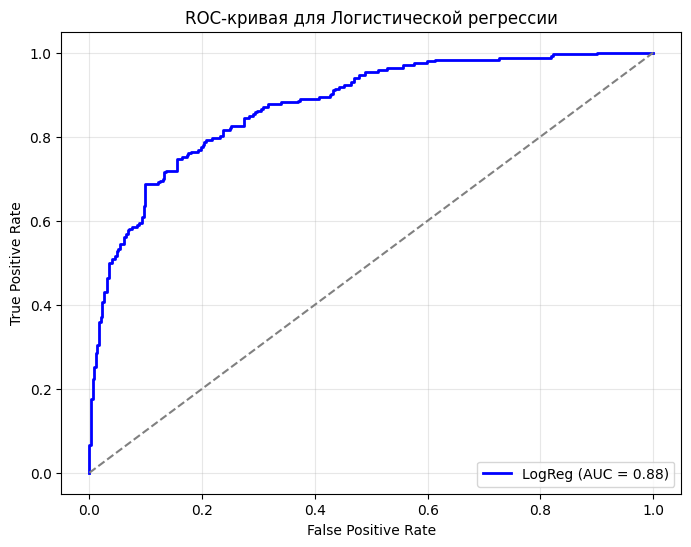

In [11]:
# Обучаем финальную модель с лучшим C
pipe.set_params(logreg__C=best_c)
pipe.fit(X_train, y_train)
y_pred_proba = pipe.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'LogReg (AUC = {best_score:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('ROC-кривая для Логистической регрессии')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)

# Сохранение
import os
os.makedirs('figures', exist_ok=True)
plt.savefig('figures/ROC_curve.png')
plt.show()